# **Airplane**

### ***¿El desarrollo de la tecnología aseguró mayor seguridad a los pasajeros?***

# **Introducción** 






La empresa Air Test Group, encargada de la construcción de aviones nos contactó para que identifiquemos patrones de las fatalidades mediante visualizaciones que los ayuden a tomar acciones preventivas para el armado de nuevas aeronaves.

Nuestra recomendación se centrará en un DataSet con información de accidentes aéreos transcurridos en el período de 1908 a 2019. Este DS contiene información de todos los accidentes aéreos civiles, comerciales programados y no programados, aviones de cargo, de posicionamiento, de transporte, militares, helicópteros comerciales, helicópteros militares y dirigibles.

*Audiencia*

Este análisis da respuesta, con evidencia, a lo solicitado por Air Test Group, donde será de utilidad para el armado de nuevas aeronaves que generen seguridad en los vuelos.

*Limitaciones*

Nuestro DS carecía de información relevante para el armado de una solución a la problemática por lo que debimos recurrir a diferentes fuentes de información para lograr una respuesta para la empresa que nos contrató. El documento contenía información desde 1908 por lo que tuvimos que adaptarnos al contexto histórico para poder sacar conclusiones actuales.

- ¿El aumento del flujo aéreo es directamente proporcional al aumento de los accidentes aéreos?
- ¿Qué avión es más seguro?
- ¿Qué avión es más inseguro?


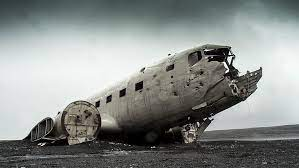

**¿Pensaste alguna vez qué hace a los aviones seguros?**

Cuando un avión llega en condiciones normales a destino, el agradecimiento suele estar destinada a los pilotos. En realidad, si bien tienen un papel importante en el desarrollo del vuelo, existen numerosas áreas que intervienen a lo largo de la cadena que conforma la seguridad del transporte aéreo y que fue evolucionando a lo largo de los años.

**- Contexto histórico:**

La historia del transporte aéreo se remonta a 1700, cuando se inventó el globo aerostático y, posteriormente, se desarrollaron las aereonaves destinadas a transportar pasajeros empleando hidrógeno como principal combustible.

El siguiente paso en la evolución histórica del transporte aéreo se produjo gracias al desarrollo consolidado de los aviones de hélice y los helicópteros en la Segunda Guerra Mundial. Durante la segunda mitad del siglo pasado, cuando despegó por completo el desarrollo de las aeronaves, la industria consiguió fabricar aviones más rápidos y seguros como las aereonaves Concorde y Boeing 747 demostrando así a lo largo del tiempo un gran desarrollo en cuanto a seguridad aerenáutica. 

[Presentación ejecutiva](https://docs.google.com/presentation/d/1zfuK-lNj5q5ByhQ-zUPdOug3R7QsYviQqu2ck1eqDT8/edit#slide=id.g15e5dcbe06c_0_405)


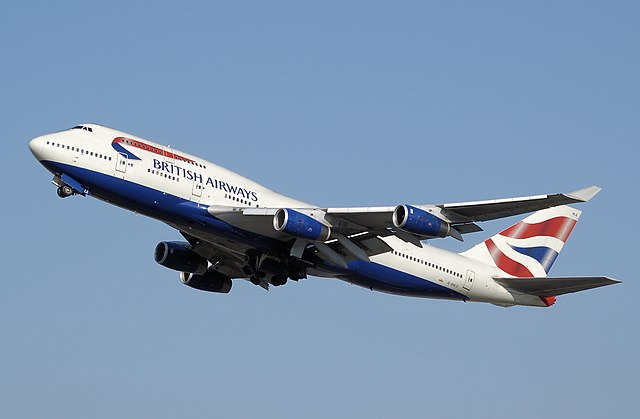


**- Contexto actual:**

En la actualidad, estos siguen constituyendo un eficaz medio de transporte de pasajeros así como también de transporte de mercancías, militares,etc. Si bien hay diversos factores por los que se producen los accidentes aéreos ya sean humanos, climáticos, falla del motor también es importante destacar que hubo muchos accidentes aéreos por falla estructural de la aereonave lo que conlleva a que las fatalidades sean totales.  

A raíz de estos contextos seleccionamos un DataSet con información de accidentes aéreos transcurridos desde 1908 a 2019, período de crecimiento en cuanto al desarrollo de naves así como también de mejoras en seguridad aereonautica. Este DS nos permite analizar la evolución de las fatalidades a lo largo de ese período de tiempo para poder identificar que tipo de avión es más seguro y cuál es mas inseguro y detallar a la empresa mejores métodos de construcción disminuyendo la cantidad de fatalidades en caso de accidente. 

Para esto, realizamos gráficas de tendencia donde mostramos la evolución de fatalidades por año teniendo en cuenta cantidad de gente a bordo, identificando seguridad de los distintos tipos de aviones.  

**Conclusiones:**

De este análisis identificamos que en el transcurso del tiempo no sólo hubo un aumento de gente a bordo sino que también observamos que las fatalidades disminuyeron, por lo que entendemos que hubo un gran avance tecnológico en cuanto a seguridad.

## Análisis exploratorio de datos

### Importo datos

In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

from datetime import datetime, timedelta

In [74]:
#from google.colab import drive
#drive.mount('/content/drive')

In [75]:
df= pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv',sep=',', parse_dates=['Date'])
df.head()

#Fuente: https://www.kaggle.com/datasets/cgurkan/airplane-crash-data-since-1908

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


**Purificación de datos**

In [76]:
#Verificación de duplicados

print(df.shape)
df= df.drop_duplicates()
print(df.shape)

(4967, 17)
(4967, 17)


In [77]:
#Eliminación de duplicados
df.drop_duplicates()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,2019-04-16,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,2019-05-05,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,2019-05-05,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,2019-06-03,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.


In [78]:
#Verificación de nulos

sum(df.isnull().sum())

7975

In [79]:
#Eliminación de nulos
df.dropna()


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
217,1930-01-19,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,14.0,2.0,16.0,14.0,2.0,0.0,"While en route to Los Angeles, the pilot, flyi..."
247,1931-03-31,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,6.0,2.0,8.0,6.0,2.0,0.0,"Shortly after taking off from Kansas City, one..."
348,1934-08-31,22:45,"Amazonia, Missouri",Rapid Air Transport,6,Kansas City - Saint Joseph - Omaha,Stinson SM-6000B,NC11118,5004,5.0,4.0,1.0,5.0,4.0,1.0,0.0,The plane crashed about 11 miles from St. Jose...
370,1935-05-06,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,12.0,2.0,5.0,3.0,2.0,0.0,The plane crashed while en route from Albuquer...
384,1935-08-14,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,3.0,1.0,4.0,3.0,1.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,2018-04-17,10:04,"NW of Philadelphia, Pennsylvania",Southwest Airlines,1380,New York - Dallas,Boeing 737-7H4,N722SW,27880/601,149.0,144.0,5.0,1.0,1.0,0.0,0.0,"While climbing to FL320, the No. 1 engine suff..."
4952,2018-05-18,12:08,"Havana, Cuba",Cubana (leased from Global Air),972,Havana- Holguin,Boeing 737-201,XA-UHZ,21816/592,113.0,107.0,6.0,112.0,106.0,6.0,0.0,After taking off from runway 06 at Havana-José...
4956,2018-10-29,06:31,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189.0,181.0,8.0,189.0,181.0,8.0,0.0,"The airliner crashed into the Jakarta Sea, 13 ..."
4959,2019-02-23,12:45,"Houston, Texas",Atlas Air serving Amazon,3591,Miami - Houston,Boeing 767-375ER,N1217A,25865,3.0,0.0,3.0,3.0,0.0,3.0,0.0,ATC lost radar contact with the cargo jet when...


In [80]:
#purificación de datos. Eliminamos columnas que no nos interesan

df.drop(['Flight #', 'Registration', 'cn/ln', 'Ground', 'Summary', 'Time', 'Aboard Passangers', 'Aboard Crew', 'Fatalities Passangers', 'Fatalities Crew'], axis=1)

,Date,Location,Operator,Route,AC Type,Aboard,Fatalities
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,1.0
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0
4,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0
...,...,...,...,...,...,...,...
4962,2019-04-16,"Puerto Montt, Chile",Archipelagos Service Aereos,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,6.0,6.0
4963,2019-05-05,"Near Monclava, Mexico",TVPX Aircraft Solutions,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,13.0,13.0
4964,2019-05-05,"Moscow, Russia",Aeroflot Russian International Airlines,Moscow - Murmansk,Sukhoi Superjet-100-95B,78.0,41.0
4965,2019-06-03,"Near Lipo, India",Military - Indian Air Force,Jorhat-Rowriah - Mechuka,Antonov An-32,13.0,13.0


Descripción de columnas
- Date: Fecha del accidente
- Location: Locación del accidente
- Operator: Empresa encargada de la aeronave
- Route: Ruta de la aeronave
- AC Type: Modelo de la aeronave
- Aboard: personas a bordo
- Fatalities: personas fallecidas

###Fatalidades por año

#**Hipótesis**:



##El aumento del flujo aéreo es directamente proporcional al aumento de los accidentes aéreos.

###Personas a bordo vs fatalidades


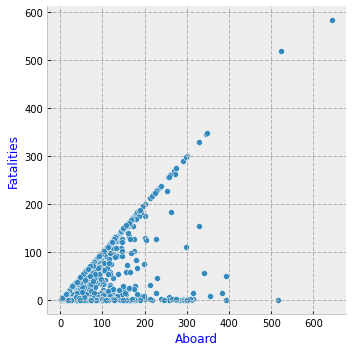

In [81]:
mpl.style.use('bmh')
mpl.rcParams['axes.labelcolor'] = 'blue' 
mpl.rcParams['grid.linewidth'] = '1'
g = sns.relplot(data=df, x="Aboard", y="Fatalities")

Conclusión: A partir de esta interrogante y dados los datos de nuestro DS, fue que decidimos graficar fatalidades vs gente a bordo. 

Por medio de las gráficas logramos identificar que cuando ocurre un accidente aéreo, hay una tendencia a que las fatalidades sean totales.


##¿El desarrollo de la tecnología aseguró mayor seguridad a los pasajeros?


In [82]:
#Fijo la fecha como índice
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
df.set_index('Date', inplace = True)

df.head()

,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
Date,,,,,,,,,,,,,,,,
1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [83]:
data = df[df['Aboard'].notna() & df['Aboard'] != 0]

In [84]:
agg_data = data[['Aboard','Fatalities']].groupby(data.index).sum()

In [85]:
agg_data['Fatalities ratio'] = agg_data['Fatalities'] / agg_data['Aboard'] 

In [86]:
agg_data[agg_data['Fatalities ratio'].isnull() | agg_data['Fatalities ratio'] < 0]

,Aboard,Fatalities,Fatalities ratio
Date,,,


In [87]:
anual_agg_data = agg_data[['Aboard','Fatalities','Fatalities ratio']].groupby(agg_data.index.year).mean()

Text(0.5, 1.0, 'Porcentaje de fatalidad por año')

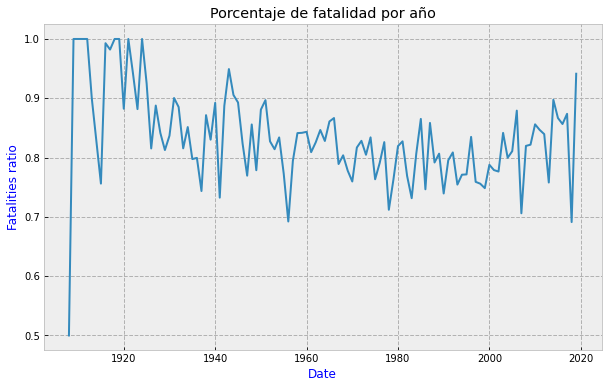

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot('Fatalities ratio',data=anual_agg_data)
ax.set_xlabel('Date')
ax.set_ylabel('Fatalities ratio')
ax.set_title('Porcentaje de fatalidad por año')

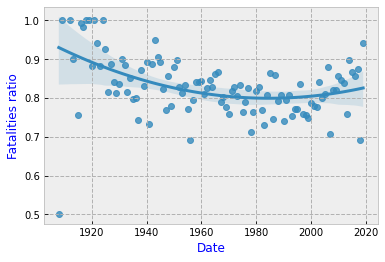

In [89]:
sns.regplot(x=anual_agg_data.index, y=anual_agg_data['Fatalities ratio'], order=2)

Conclusión: Por medio de este análisis identificamos que en el transcurso del tiempo no sólo hubo un aumento de gente a bordo sino que también observamos que las fatalidades disminuyeron.
Por este motivo podemos considerar que por medio del transcurso de los años hubo un gran avance tecnológico en cuanto a seguridad.


#Avión más seguro

In [90]:
data = df[df['Aboard'].notna() & df['Aboard'] != 0]

In [91]:
data_by_ac = data.copy()
data_by_ac['Fatalities ratio'] = data_by_ac['Fatalities'] / data_by_ac['Aboard']
agg_data_by_ac = data_by_ac.groupby(by=data_by_ac['AC Type']).mean()
agg_data_by_ac.reset_index(inplace=True)
agg_data_by_ac.sort_values(['Fatalities ratio','Fatalities'], ascending=False).tail(10)

,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Fatalities ratio
1426,Grummand EA-6B,2.0,0.0,2.0,0.0,0.0,0.0,20.0,0.0
1763,Lockheed L-1011,232.0,221.0,11.0,0.0,0.0,0.0,0.0,0.0
1825,Mc Donnell Douglas MD-81,129.0,123.0,6.0,0.0,0.0,0.0,0.0,0.0
1870,McDonnell Douglas DC-9-51,85.0,79.0,6.0,0.0,0.0,0.0,47.0,0.0
1892,MiG-23,1.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0
1934,North American F-100D-25NA,1.0,0.0,1.0,0.0,0.0,0.0,17.0,0.0
1937,Northrop Delta,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1985,Rochrbach Roland,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2150,Sukhoi Su-27,2.0,0.0,2.0,0.0,0.0,0.0,85.0,0.0
2311,Wapiti,2.0,0.0,2.0,0.0,0.0,2.0,15.0,0.0


Los aviones más seguros son: Lockheed L-1011 TriStar, McDonnell Douglas MD-80 y McDonnell Douglas DC-9. Podemos identificar esto ya que su tasa de fatalidades respecto a la cantidad de gente a bordo fue menor. Por tal motivo, estos tipos de aviones son los que podemos recomendar a las empresas que quieran elaborar aviones con mayor seguridad.


# Avión menos seguro

In [92]:
data_by_ac = data.copy()
data_by_ac['Fatalities ratio'] = data_by_ac['Fatalities'] / data_by_ac['Aboard']
agg_data_by_ac = data_by_ac.groupby(by=data_by_ac['AC Type']).mean()
agg_data_by_ac.reset_index(inplace=True)
agg_data_by_ac.sort_values(['Fatalities ratio','Fatalities'], ascending=False).head(10)

,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Fatalities ratio
596,Boeing B-747-168B / Ilyushin IL-76TD,349.0,316.0,33.0,349.0,316.0,33.0,0.0,1.0
1663,Lockheed 1011-200 TriStar,301.0,287.0,14.0,301.0,287.0,14.0,0.0,1.0
431,Boeing 777-2H6ER,298.0,283.0,15.0,298.0,283.0,15.0,0.0,1.0
93,Airbus A300B2-203,290.0,278.0,12.0,290.0,278.0,12.0,0.0,1.0
1554,Ilyushin Il-76MD,275.0,257.0,18.0,275.0,257.0,18.0,0.0,1.0
601,Boeing B-747-237B,271.0,248.5,22.5,271.0,248.5,22.5,0.0,1.0
600,Boeing B-747-230B,269.0,246.0,23.0,269.0,246.0,23.0,0.0,1.0
1835,McDonnell Douglas DC-8 Super 61,261.0,247.0,14.0,261.0,247.0,14.0,0.0,1.0
76,Airbus A-300-605R,260.0,251.0,9.0,260.0,251.0,9.0,5.0,1.0
591,Boeing B-747-121A,259.0,243.0,16.0,259.0,243.0,16.0,11.0,1.0


Los aviones menos seguros son: Boeing B-747-168B, Lockheed L-1011 TriStar y Boeing 777. Logramos identificar esto ya que los mismos, son los que tienen mayor tasa de fatalidad. Teniendo en cuenta esta información nosotros como empresa no recomendamos el uso de los mismos como ejemplo para la elaboración de nuevas aeronaves.
